# Telecom Churn Case Study

In [3]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the Data Set
telecom_df=pd.read_csv('telecom_churn_data.csv')

In [5]:
# Checking the number of rows and columns
telecom_df.shape

(99999, 226)

In [6]:
# Inspecting rows and cloumns
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
# Understanding all xolumns with data types
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Checking basic statistical summary for data
telecom_df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [9]:
# For checking duplicate values
telecom_df.duplicated().sum()

0

In [10]:
# for checking null values in the dataset
null_values= (telecom_df.isnull().sum()/len(telecom_df.index))*100
null_values_df=pd.DataFrame(null_values)
null_values_df=null_values_df.rename(columns={0:'null_percentage'})
null_values_df.sort_values(by='null_percentage',ascending=False)

,null_percentage
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


# Data Cleaning

### Handling Missing Values in Columns

In [13]:
# Columns with more than 30 Percent Missing Values:
columns_to_delete=null_values_df[null_values_df.null_percentage>30].index
columns_to_delete

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [14]:
#Dropping Columns with More than 30% Missing values:
telecom_df=telecom_df.drop(columns_to_delete,axis=1)
telecom_df.shape

(99999, 186)

### Deleting Date Columns as they are not relevant for Analysis 

In [16]:
date_columns=[i for i in telecom_df.columns if 'date' in i]
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [17]:
telecom_df=telecom_df.drop(date_columns,axis=1)
telecom_df.shape

(99999, 178)

### Deleting columns with 1 unique values as they are not relevant for our analysis

In [19]:
#Checking Columns which have only 1unique values
unique_column_1 = [i for i in telecom_df.columns if telecom_df[i].nunique()==1]
unique_column_1

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [20]:
telecom_df=telecom_df.drop(unique_column_1,axis=1)
telecom_df.shape

(99999, 166)

# Filter High Value Customers

In [22]:
# 70th Percentiles of avg amount recharged in good phase
telecom_df['avg_rech_amt_6_7']=(telecom_df['total_rech_amt_6']+telecom_df['total_rech_amt_7'])/2

In [23]:
X=telecom_df['avg_rech_amt_6_7'].quantile(0.70)
X

368.5

In [24]:
telecom_df=telecom_df[telecom_df['avg_rech_amt_6_7']>=X]
telecom_df.shape

(30011, 167)

###  Data cleaning for missing values in rows

In [26]:
#Checking rows having more than 50 percent Value:
missing_rows_50=telecom_df[(telecom_df.isnull().sum(axis=1))>(len(telecom_df.columns)//2)]
missing_rows_50

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
2185,7000237332,386.514,386.506,386.491,386.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,4,455,455,455,455,455,455,455,455,455,455,455,0,3.65,71.00,11.73,9.97,285.63,2316.13,1429.59,1205.97,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,882,172.71,657.55,9.22,0.00,455.0
3506,7002324263,996.558,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0,0,875,0,0,0,550,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2033,0.00,0.00,0.00,0.00,437.5
4190,7000293582,2502.516,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [27]:
#droping rows with more than 50 Percent missing values:
telecom_df=telecom_df.drop(missing_rows_50.index)
telecom_df.shape

(29897, 167)

#### Creating a function for missing columns

In [29]:
def missing_column(df):
    missing_column=round((df.isnull().sum()/len(df.index))*100,2)
    df_missing_column=pd.DataFrame(missing_column)
    df_missing_column=df_missing_column.rename(columns=({0:'missing'}))
    return df_missing_column.sort_values(by='missing',ascending=False).head(100)

In [30]:
missing_column(telecom_df)

,missing
og_others_9,5.32
roam_ic_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2m_mou_9,5.32
isd_og_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2m_mou_9,5.32
loc_ic_t2f_mou_9,5.32
std_og_t2t_mou_9,5.32


Minutes of Usage for the month of September are have same perecentage of missing values, hence we will drop these columns.

In [32]:
# Extracting all indices with missing value as 5.32
missing_value_df = missing_column(telecom_df)
extract_null = missing_value_df[missing_value_df['missing'] == 5.32]
extract_null.index

Index(['og_others_9', 'roam_ic_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2m_mou_9',
       'isd_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_og_t2t_mou_9',
       'roam_og_mou_9', 'loc_ic_mou_9', 'std_og_mou_9', 'std_ic_t2t_mou_9',
       'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'offnet_mou_9',
       'std_ic_t2f_mou_9', 'std_og_t2f_mou_9', 'std_ic_mou_9', 'onnet_mou_9',
       'spl_ic_mou_9', 'loc_og_mou_9', 'isd_ic_mou_9', 'std_og_t2m_mou_9',
       'ic_others_9', 'spl_og_mou_9'],
      dtype='object')

In [33]:
# Creating a DataFrame for the months of September 
df_missing_mou_9=telecom_df[(telecom_df['onnet_mou_9'].isnull()) & (telecom_df['offnet_mou_9'].isnull()) & (telecom_df['roam_ic_mou_9'].isnull()) & (telecom_df['roam_og_mou_9'].isnull()) & (telecom_df['loc_og_t2t_mou_9'].isnull()) & (telecom_df['loc_og_t2m_mou_9'].isnull()) & (telecom_df['loc_og_t2f_mou_9'].isnull()) & (telecom_df['loc_og_t2c_mou_9'].isnull()) & (telecom_df['loc_og_mou_9'].isnull()) & (telecom_df['std_og_t2t_mou_9'].isnull()) & (telecom_df['std_og_t2m_mou_9'].isnull())
                    & (telecom_df['std_og_t2f_mou_9'].isnull()) & (telecom_df[ 'std_og_mou_9'].isnull()) & (telecom_df['isd_og_mou_9'].isnull()) & (telecom_df[ 'spl_og_mou_9'].isnull()) & (telecom_df['og_others_9'].isnull()) & (telecom_df['loc_ic_t2t_mou_9'].isnull()) & (telecom_df['loc_ic_t2m_mou_9'].isnull()) & (telecom_df['loc_ic_t2f_mou_9'].isnull()) & (telecom_df['loc_ic_mou_9'].isnull()) & (telecom_df['std_ic_t2t_mou_9'].isnull()) & (telecom_df['std_ic_t2m_mou_9'].isnull())
                    & (telecom_df['std_ic_t2f_mou_9'].isnull()) & (telecom_df['std_ic_mou_9'].isnull()) &  (telecom_df['spl_ic_mou_9'].isnull()) & (telecom_df['isd_ic_mou_9'].isnull()) & (telecom_df['ic_others_9'].isnull())]

In [34]:
df_missing_mou_9

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.00,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.00,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,484.36,413.28,199.64,NaN,0.00,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4.16,0.00,NaN,0.00,0.00,0.00,NaN,0.49,5.53,1.06,NaN,32.04,67.84,32.16,0.0,0.63,0.0,0.00,NaN,0.00,0.00,0.00,NaN,1.36,1.83,0.00,NaN,14,17,14,3,432,328,206,0,36,44,36,0,30,20,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50

In [35]:
# Dropping all missing values for the month of September
telecom_df=telecom_df.drop(df_missing_mou_9.index)
telecom_df.shape

(28307, 167)

In [36]:
missing_column(telecom_df)

,missing
loc_ic_t2f_mou_8,0.55
loc_og_t2f_mou_8,0.55
spl_og_mou_8,0.55
loc_og_t2m_mou_8,0.55
loc_ic_t2t_mou_8,0.55
isd_og_mou_8,0.55
loc_ic_t2m_mou_8,0.55
loc_og_t2t_mou_8,0.55
std_og_t2t_mou_8,0.55
loc_ic_mou_8,0.55


Similarly there are same missing values for minutes of usage for the month of August

In [38]:
#Extracting all columns with missing values with null values 0.55
missing_value_df = missing_column(telecom_df)
extract_null = missing_value_df[missing_value_df['missing'] == 0.55]
extract_null.index

Index(['loc_ic_t2f_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'isd_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_8',
       'loc_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8',
       'std_og_mou_8', 'roam_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'offnet_mou_8', 'std_og_t2f_mou_8', 'std_ic_mou_8', 'loc_og_mou_8',
       'onnet_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'std_og_t2m_mou_8',
       'ic_others_8', 'og_others_8'],
      dtype='object')

In [39]:
# Creating a DataFrame for the month of August
df_missing_mou_8=telecom_df[(telecom_df['onnet_mou_8'].isnull()) & (telecom_df['offnet_mou_8'].isnull()) & (telecom_df['roam_ic_mou_8'].isnull()) & (telecom_df['roam_og_mou_8'].isnull()) & (telecom_df['loc_og_t2t_mou_8'].isnull()) & (telecom_df['loc_og_t2m_mou_8'].isnull()) & (telecom_df['loc_og_t2f_mou_8'].isnull()) & (telecom_df['loc_og_t2c_mou_8'].isnull()) & (telecom_df['loc_og_mou_8'].isnull()) & (telecom_df['std_og_t2t_mou_8'].isnull()) & (telecom_df['std_og_t2m_mou_8'].isnull())
                    & (telecom_df['std_og_t2f_mou_8'].isnull()) & (telecom_df[ 'std_og_mou_8'].isnull()) & (telecom_df['isd_og_mou_8'].isnull()) & (telecom_df[ 'spl_og_mou_8'].isnull()) & (telecom_df['og_others_8'].isnull()) & (telecom_df['loc_ic_t2t_mou_8'].isnull()) & (telecom_df['loc_ic_t2m_mou_8'].isnull()) & (telecom_df['loc_ic_t2f_mou_8'].isnull()) & (telecom_df['loc_ic_mou_8'].isnull()) & (telecom_df['std_ic_t2t_mou_8'].isnull()) & (telecom_df['std_ic_t2m_mou_8'].isnull())
                    & (telecom_df['std_ic_t2f_mou_8'].isnull()) & (telecom_df['std_ic_mou_8'].isnull()) &  (telecom_df['spl_ic_mou_8'].isnull()) & (telecom_df['isd_ic_mou_8'].isnull()) & (telecom_df['ic_others_8'].isnull())]

In [40]:
df_missing_mou_8

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,580.477,111.878,0.000,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.00,0.00,NaN,0.00,0.00,0.00,NaN,352.31,0.00,0.00,NaN,0.00,0.00,0.00,NaN,4.78,0.00,0.00,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.00,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.00,NaN,0.00,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.00,0.00,0.00,0.00,415.0
578,7000248548,569.612,237.289,0.000,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.00,0.00,NaN,0.00,2.33,0.00,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.00,0.00,NaN,0.00,1149.21,271.29,NaN,0.00,0.00,0.00,NaN,0.00,2.58,1.21,NaN,0.00,1.55,0.00,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.00,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.00,NaN,0.00,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,19,10,0,4,717,220,0,0,110,50,0,0,27,30,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,274,0.00,0.00,0.00,0.00,468.5
788,7000636808,532.742,546.756,0.000,

In [41]:
#Dropping all missing values for the month of August
telecom_df=telecom_df.drop(df_missing_mou_8.index)

In [42]:
missing_column(telecom_df)

,missing
std_og_mou_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
std_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44
std_og_t2f_mou_6,0.44
isd_og_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44


Similarly there are same prcentage of missing values for the month of June

In [44]:
# Extracting null values with 0.44
missing_value_df = missing_column(telecom_df)
extract_null = missing_value_df[missing_value_df['missing'] == 0.44]
extract_null.index

Index(['std_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2m_mou_6',
       'loc_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'ic_others_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_mou_6', 'loc_og_t2f_mou_6',
       'spl_ic_mou_6', 'roam_og_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6',
       'offnet_mou_6', 'roam_ic_mou_6'],
      dtype='object')

In [45]:
# Creating a DataFrame for the month of June
df_missing_mou_6=telecom_df[(telecom_df['onnet_mou_6'].isnull()) & (telecom_df['offnet_mou_6'].isnull()) & (telecom_df['roam_ic_mou_6'].isnull()) & (telecom_df['roam_og_mou_6'].isnull()) & (telecom_df['loc_og_t2t_mou_6'].isnull()) & (telecom_df['loc_og_t2m_mou_6'].isnull()) & (telecom_df['loc_og_t2f_mou_6'].isnull()) & (telecom_df['loc_og_t2c_mou_6'].isnull()) & (telecom_df['loc_og_mou_6'].isnull()) & (telecom_df['std_og_t2t_mou_6'].isnull()) & (telecom_df['std_og_t2m_mou_6'].isnull())
                    & (telecom_df['std_og_t2f_mou_6'].isnull()) & (telecom_df[ 'std_og_mou_6'].isnull()) & (telecom_df['isd_og_mou_6'].isnull()) & (telecom_df[ 'spl_og_mou_6'].isnull()) & (telecom_df['og_others_6'].isnull()) & (telecom_df['loc_ic_t2t_mou_6'].isnull()) & (telecom_df['loc_ic_t2m_mou_6'].isnull()) & (telecom_df['loc_ic_t2f_mou_6'].isnull()) & (telecom_df['loc_ic_mou_6'].isnull()) & (telecom_df['std_ic_t2t_mou_6'].isnull()) & (telecom_df['std_ic_t2m_mou_6'].isnull())
                    & (telecom_df['std_ic_t2f_mou_6'].isnull()) & (telecom_df['std_ic_mou_6'].isnull()) &  (telecom_df['spl_ic_mou_6'].isnull()) & (telecom_df['isd_ic_mou_6'].isnull()) & (telecom_df['ic_others_6'].isnull())]

In [46]:
#Dropping all missing values for the month of June
telecom_df=telecom_df.drop(df_missing_mou_6.index)

In [47]:
missing_column(telecom_df)

,missing
loc_og_t2m_mou_7,0.12
loc_ic_t2f_mou_7,0.12
og_others_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_mou_7,0.12
ic_others_7,0.12
spl_ic_mou_7,0.12
std_og_mou_7,0.12
loc_ic_t2t_mou_7,0.12


At last we have same percentage for the month of June

In [49]:
missing_value_df = missing_column(telecom_df)
extract_null = missing_value_df[missing_value_df['missing'] == 0.12]
extract_null.index

Index(['loc_og_t2m_mou_7', 'loc_ic_t2f_mou_7', 'og_others_7', 'isd_ic_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_mou_7', 'ic_others_7', 'spl_ic_mou_7',
       'std_og_mou_7', 'loc_ic_t2t_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7',
       'std_og_t2t_mou_7', 'loc_ic_t2m_mou_7', 'roam_og_mou_7',
       'loc_og_t2c_mou_7', 'loc_ic_mou_7', 'std_ic_t2f_mou_7', 'roam_ic_mou_7',
       'std_og_t2m_mou_7', 'std_ic_mou_7', 'std_ic_t2m_mou_7', 'offnet_mou_7',
       'std_og_t2f_mou_7', 'isd_og_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7'],
      dtype='object')

In [50]:
df_missing_mou_7=telecom_df[(telecom_df['onnet_mou_7'].isnull()) & (telecom_df['offnet_mou_7'].isnull()) & (telecom_df['roam_ic_mou_7'].isnull()) & (telecom_df['roam_og_mou_7'].isnull()) & (telecom_df['loc_og_t2t_mou_7'].isnull()) & (telecom_df['loc_og_t2m_mou_7'].isnull()) & (telecom_df['loc_og_t2f_mou_7'].isnull()) & (telecom_df['loc_og_t2c_mou_7'].isnull()) & (telecom_df['loc_og_mou_7'].isnull()) & (telecom_df['std_og_t2t_mou_7'].isnull()) & (telecom_df['std_og_t2m_mou_7'].isnull())
                    & (telecom_df['std_og_t2f_mou_7'].isnull()) & (telecom_df[ 'std_og_mou_7'].isnull()) & (telecom_df['isd_og_mou_7'].isnull()) & (telecom_df[ 'spl_og_mou_7'].isnull()) & (telecom_df['og_others_7'].isnull()) & (telecom_df['loc_ic_t2t_mou_7'].isnull()) & (telecom_df['loc_ic_t2m_mou_7'].isnull()) & (telecom_df['loc_ic_t2f_mou_7'].isnull()) & (telecom_df['loc_ic_mou_7'].isnull()) & (telecom_df['std_ic_t2t_mou_7'].isnull()) & (telecom_df['std_ic_t2m_mou_7'].isnull())
                    & (telecom_df['std_ic_t2f_mou_7'].isnull()) & (telecom_df['std_ic_mou_7'].isnull()) &  (telecom_df['spl_ic_mou_7'].isnull()) & (telecom_df['isd_ic_mou_7'].isnull()) & (telecom_df['ic_others_7'].isnull())]

In [51]:
telecom_df=telecom_df.drop(df_missing_mou_7.index)

In [52]:
telecom_df.shape

(27991, 167)

# Extracting the Churn Variable

In [54]:
telecom_df['Churn']=(telecom_df['total_ic_mou_9']+telecom_df['total_og_mou_9']+telecom_df['vol_2g_mb_9']+telecom_df['vol_3g_mb_9']).map(lambda X:1 if X==0 else 0)
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,Churn
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0.00,7.49,8.51,215.58,26.11,255.26,138.29,115.68,38.29,154.58,62.39,308.13,29.79,317.91,151.51,0.00,0.0,1.91,0.0,423.81,68.09,474.41,213.91,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,0.0,245.28,62.11,393.39,259.33,83.48,16.24,21.44,20.31,6,4,11,7,507,253

###  Removing Data for Churn Phase

In [56]:
column_9=[i for i in telecom_df.columns if '_9' in i]
column_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [57]:
# Dropping all values for Churn phase
telecom_df=telecom_df.drop(column_9,axis=1)

In [58]:
# Dropping column for churn phase
telecom_df=telecom_df.drop('sep_vbc_3g',axis=1)

In [59]:
telecom_df.shape

(27991, 127)

# Data Standardisation 

### Handling missng values

In [62]:
columns =telecom_df.columns.to_list()
columns.remove('Churn')
columns.remove('mobile_number')
print(columns)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [63]:
# Removing Outliers from Numeric Columns
for col in columns:
    q1=telecom_df[col].quantile(0.25)
    q3=telecom_df[col].quantile(0.75)
    IQR=q3-q1
    l1=q1-(1.5*IQR)
    l3=q3+(1.5*IQR)
    new_df=telecom_df.loc[(telecom_df[col]>l1) & (telecom_df[col]<l3)]
new_df.shape

(26328, 127)

# Deriving new  Features For Analysis

### Decrease in minutes of usage in action phase compared to good phase

In [66]:
new_df['total_mou_good']=new_df['total_og_mou_6']+new_df['total_ic_mou_6']

In [67]:
new_df['avg_mou_action']=(new_df['total_og_mou_7']+new_df['total_og_mou_8']+new_df['total_ic_mou_7']+new_df['total_ic_mou_8'])/2

In [68]:
new_df['diff']=new_df['avg_mou_action']-new_df['total_mou_good']

In [69]:
new_df['decrease_minutes_usage']=new_df['diff'].map(lambda X: 1 if X<0 else 0)
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_minutes_usage
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,

### Decrease in recharge number in action phase compared to good phase

In [71]:
new_df['avg_rech_num_action']=(new_df['total_rech_num_7']+new_df['total_rech_num_8'])/2

In [72]:
new_df['diff_rech_num']=new_df['avg_rech_num_action']-new_df['total_rech_num_6']

In [73]:
new_df['decrease_recharge_num']=new_df['diff_rech_num'].map(lambda X: 1 if X<0 else 0)
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_minutes_usage,avg_rech_num_action,diff_rech_num,decrease_recharge_num
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965

### Decrease in Recharge Amount in action phase compared to good phase

In [75]:
new_df['avg_rech_amt_action']=(new_df['total_rech_amt_7']+new_df['total_rech_amt_8'])/2

In [76]:
new_df['diff_rech_amt']=new_df['avg_rech_amt_action']-new_df['total_rech_amt_6']

In [77]:
new_df['decrease_recharge_amt']=new_df['diff_rech_amt'].map(lambda X: 1 if X<0 else 0)
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_minutes_usage,avg_rech_num_action,diff_rech_num,decrease_recharge_num,avg_rech_amt_action,diff_rech_amt,decrease_recharge_amt
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0

### Decrease in Average Revenue Per User in action phase compared to good phase

In [79]:
new_df['avg_arpu_action']=(new_df['arpu_7']+new_df['arpu_8'])/2

In [80]:
new_df['diff_arpu']=new_df['avg_arpu_action']-new_df['arpu_6']

In [81]:
new_df['decrease_average_revenue']=new_df['diff_arpu'].map(lambda X: 1 if X<0 else 0)

In [82]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_minutes_usage,avg_rech_num_action,diff_rech_num,decrease_recharge_num,avg_rech_amt_action,diff_rech_amt,decrease_recharge_amt,avg_arpu_action,diff_arpu,decrease_average_revenue
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,

### Decrease in Volume Based Cost in action phase compared to good phase

In [84]:
new_df['avg_vbc_3g_action']=(new_df['jul_vbc_3g']+new_df['aug_vbc_3g'])/2

In [85]:
new_df['diff_vbc']=new_df['avg_vbc_3g_action']-new_df['jun_vbc_3g']

In [86]:
new_df['decrease_volume_cost']=new_df['diff_vbc'].map(lambda X: 1 if X<0 else 0)

In [87]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_minutes_usage,avg_rech_num_action,diff_rech_num,decrease_recharge_num,avg_rech_amt_action,diff_rech_amt,decrease_recharge_amt,avg_arpu_action,diff_arpu,decrease_average_revenue,avg_vbc_3g_action,diff_vbc,decrease_volume_cost
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68

# EDA


## Checking the churn percentage

In [90]:
telecom_df['Churn'].value_counts(normalize=True)

Churn
0    0.966096
1    0.033904
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage of chrun')

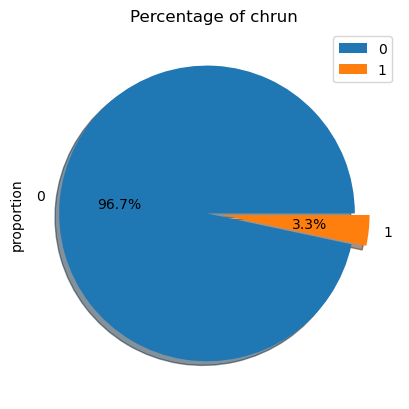

In [91]:
values = new_df['Churn'].value_counts(normalize=True)
explode = [0.05]* len(values) 
new_df['Churn'].value_counts(normalize=True).plot.pie(autopct="%1.1f%%",explode= explode, shadow=True)
plt.legend(loc='best')
plt.title('Percentage of chrun')

We can infer from calculations and pie chart that is a case of class imbalance

In [93]:
var_list = ['decrease_minutes_usage','decrease_recharge_num','decrease_recharge_amt','decrease_average_revenue','decrease_volume_cost']

<Figure size 1000x500 with 0 Axes>

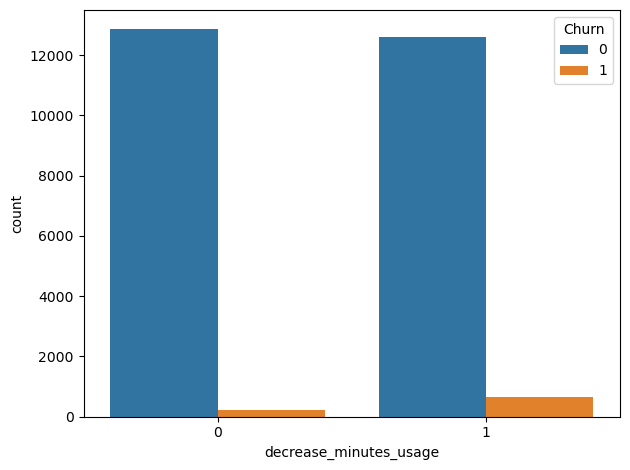

<Figure size 1000x500 with 0 Axes>

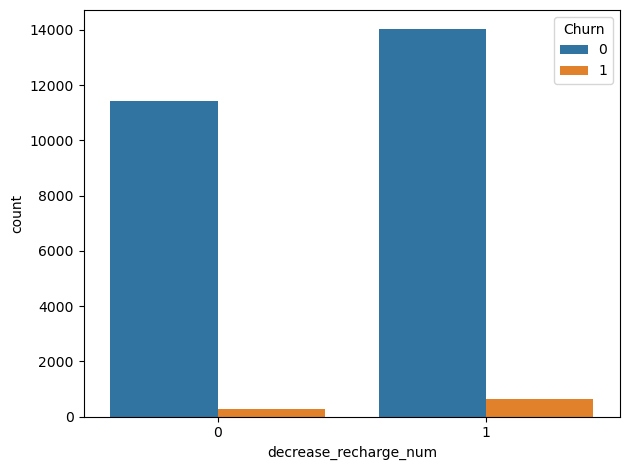

<Figure size 1000x500 with 0 Axes>

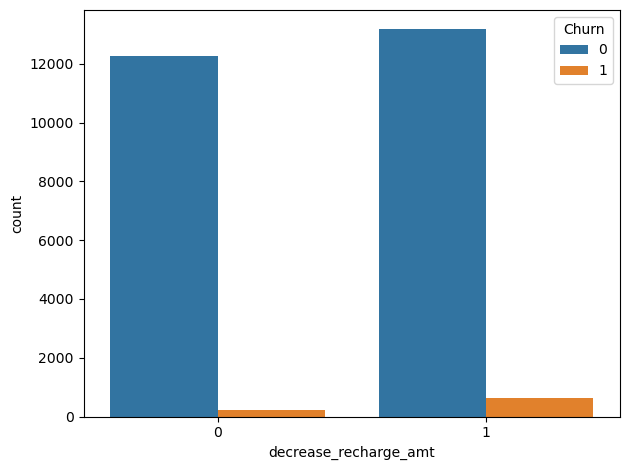

<Figure size 1000x500 with 0 Axes>

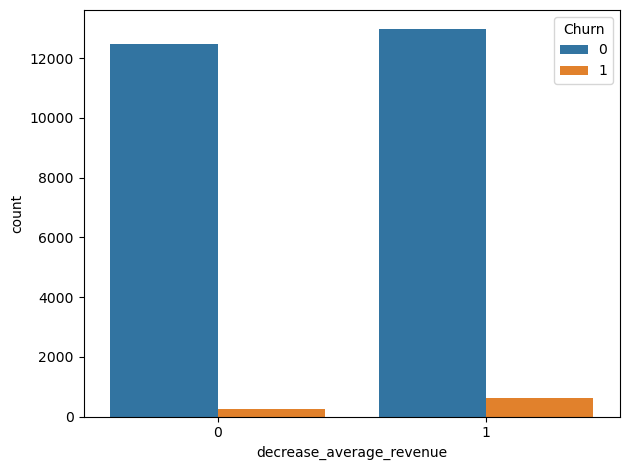

<Figure size 1000x500 with 0 Axes>

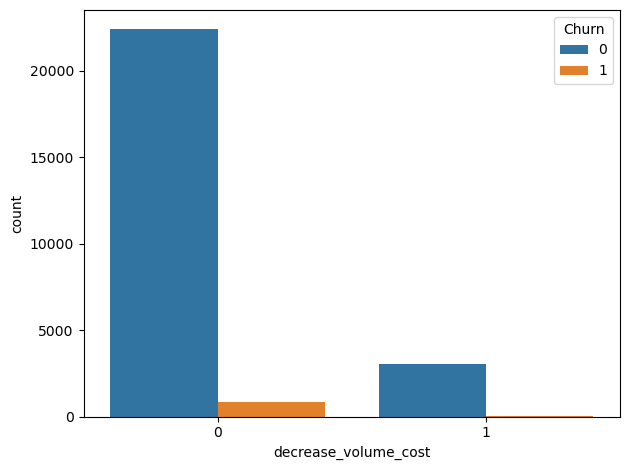

In [94]:
for i, var in enumerate(var_list):
    plt.figure(figsize=(10,5))
    plt.subplots(1,1)
    sns.countplot(x=var, hue='Churn', data = new_df)
    plt.tight_layout()
    plt.show()

<Figure size 1000x500 with 0 Axes>

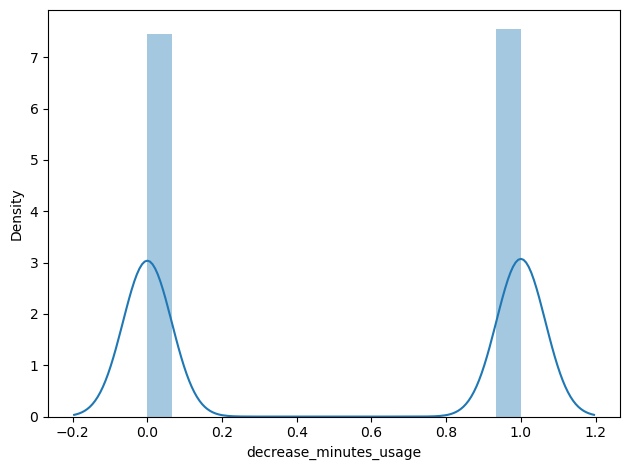

<Figure size 1000x500 with 0 Axes>

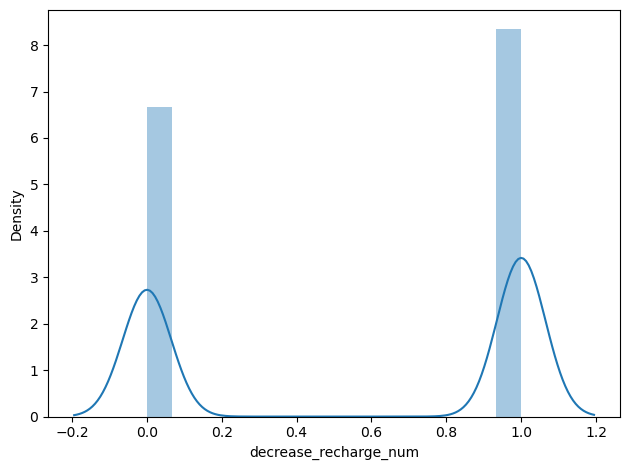

<Figure size 1000x500 with 0 Axes>

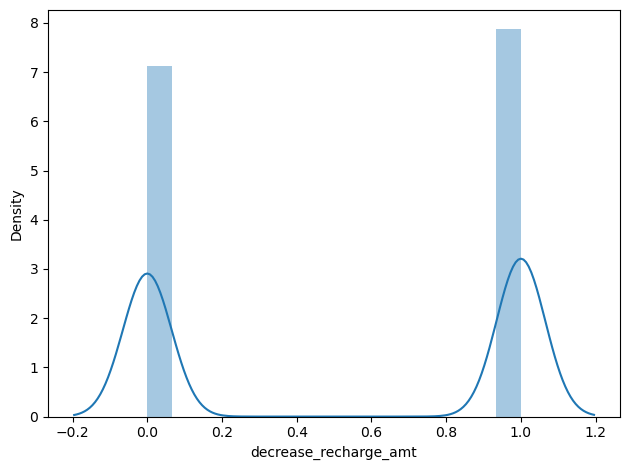

<Figure size 1000x500 with 0 Axes>

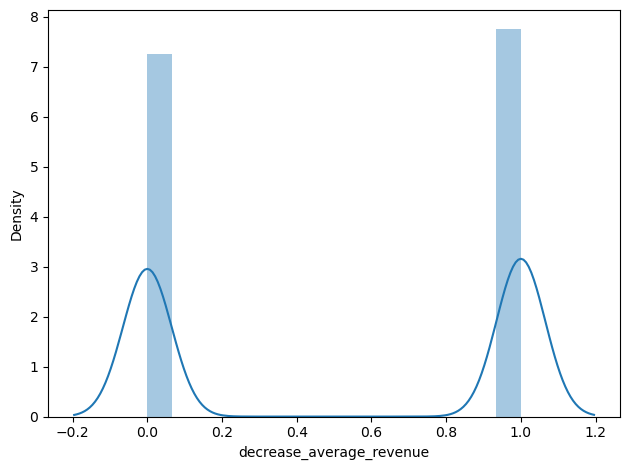

<Figure size 1000x500 with 0 Axes>

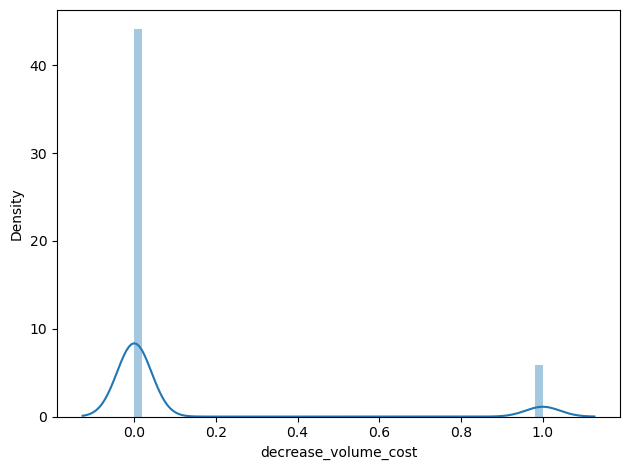

In [95]:
for i, var in enumerate(var_list):
    plt.figure(figsize=(10,5))
    plt.subplots(1,1)
    sns.distplot(new_df[var], kde=True)
    plt.tight_layout()
    plt.show()

Conclusions:
- Churn is high for customers whi have reduced their minutes of usagein the action phase.
- Churn is high for customer who have reduced their recharge number in action phase.
- Customers who have decreased the recharge number in action phase are more prone to churn.
- customers whose volumne based cost is increased are more vulnerable to churn.

In [97]:
# Checking for correlation among the newly created variables
corr = new_df[var_list].corr()

<Axes: >

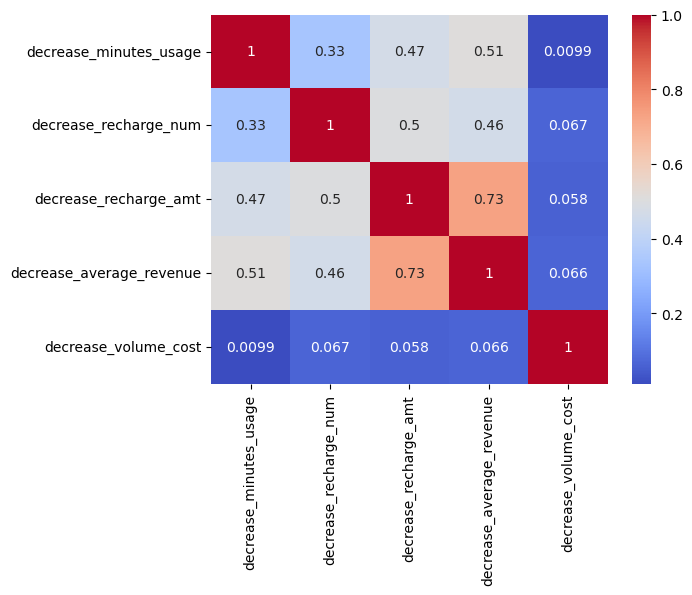

In [98]:
#Plotting heatmap for correlation
sns.heatmap(corr, annot=True, cmap='coolwarm')

There is a high correlation in decrease in recharge revenue and recharge amount. However is is not that high that we have to drop it.

In [100]:
# Dropping some newly created columns as they are not relevant for analysis
new_df=new_df.drop(['total_mou_good','avg_mou_action','diff','avg_rech_num_action','diff_rech_num','avg_rech_amt_action','diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'],axis=1)

In [101]:
new_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,decrease_minutes_usage,decrease_recharge_num,decrease_recharge_amt,decrease_average_revenue,decrease_volume_cost
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,1,1,1,1,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1,0,1,1,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,1,1,1,1,1
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,

# Train-Test Split

In [103]:
# Splitting data into dependent and independent variable
X=new_df.drop(['mobile_number','Churn'],axis=1)
y=new_df['Churn']

In [104]:
# Splitting data into train and test
X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.7,random_state=100)

### Handling the Data Imbalance with Synthetic Minority Over-Sampling Technique

In [106]:
sm=SMOTE(random_state=27)

In [107]:
X_train,y_train=sm.fit_resample(X_train,y_train)

In [108]:
X_train.shape, y_train.shape

((35654, 130), (35654,))

In [109]:
y_train.value_counts()

Churn
0    17827
1    17827
Name: count, dtype: int64

# Feature Scaling

In [111]:
columns_to_scale =X_train.columns.to_list()
columns_to_scale.remove('decrease_minutes_usage')
columns_to_scale.remove('decrease_recharge_num')
columns_to_scale.remove('decrease_recharge_amt')
columns_to_scale.remove('decrease_average_revenue')
columns_to_scale.remove('decrease_volume_cost')

In [112]:
scaler=StandardScaler()
X_train[columns_to_scale]=scaler.fit_transform(X_train[columns_to_scale])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_minutes_usage,decrease_recharge_num,decrease_recharge_amt,decrease_average_revenue,decrease_volume_cost
0,0.227729,-0.175066,0.398486,-0.506508,-0.545957,-0.285620,-0.377591,-0.402128,-0.285660,-0.244136,-0.249336,-0.307448,-0.327271,-0.386631,-0.423808,0.290458,0.163996,0.187674,0.726011,0.672772,0.336910,0.639362,0.212150,-0.048491,-0.215676,-0.259898,0.573011,0.676358,0.533341,0.323348,-0.594985,-0.608057,-0.346821,-0.651878,-0.638593,-0.428760,-0.139488,-0.132006,-0.119542,-0.903302,-0.899867,-0.523724,-0.07326,-0.084842,-0.05303,1.176248,1.297404,1.597585,8.536265,-0.014118,-0.012887,-0.526363,-0.574152,-0.253991,0.337422,0.092462,-0.153038,3.094281,5.262407,1.545043,-0.285141,-0.068731,0.168412,2.286606,3.615009,1.014318,-0.094475,-0.159553,-0.047886,-0.261521,-0.303552,-0.246502,-0.144418,-0.148534,-0.117599,-0.248838,-0.322571,-0.232828,1.776543,2.786653,0.748340,0.870911,-0.105999,-0.198258,-0.162442,-0.157936,-0.13216,-0.003725,-0.014393,-0.008334,2.435095,1.561009,3.159478,0.005324,-0.257289,0.381140,-0.980608,-0.782671,-0.785225,-0.614681,-0.536434,-0.569264,-0.250050,-0.236381,1.004800,-0.265087,-0.279450,-0.260144,-0.245886,-0.250768,-0.235046,-0.256101,-0.272623,2.438518,-0.216432,-0.215957,-0.209444,-0.131475,-0.132895,-0.118176,-0.929181,-0.258231,-0.262442,-0.254398,-0.172309,1,1,1,1,0
1,-0.435482,0.421151,-1.105189,-0.629882,-0.655819,-0.473204,-0.777616,-0.751708,-0.646933,-0.244136,-0.249336,-0.307448,-0.327271,-0.386631,-0.423808,0.110494,-0.076479,-0.093275,-0.328726,-0.225798,-0.469797,1.392525,0.739267,0.864215,-0.215676,-0.261263,-0.235151,-0.057428,-0.146130,-0.306047,-0.654269,-0.618320,-0.421548,-0.655824,-0.638593,-0.438494,-0.139488,-0.132006,-0.119542,-0.950617,-0.907365,-0.581275,-0.07326,-0.084842,-0.05303,-0.360207,-0.382920,-0.272915,-0.306300,-0.014118,-0.012887,-0.980755,-0.962948,-0.668284,-0.122533,1.779079,3.133707,0.735349,4.138417,0.096261,0.225887,-0.241609,0.012521,0.488992,3.691830,1.599379,-0.221596,-0.208414,-0.206236,-0.348594,-0.303552,-0.238341,-0.144418,-0.148534,-0.117599,-0.386772,-0.349484,-0.293356,0.203719,2.833989,1.218730,-0.457179,-0.105999,-0.198258,-0.162442,-0.157936,-0.13216,-0.075561,-0.0825

In [113]:
X_test[columns_to_scale]=scaler.transform(X_test[columns_to_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_minutes_usage,decrease_recharge_num,decrease_recharge_amt,decrease_average_revenue,decrease_volume_cost
43013,-0.353885,0.325968,0.835683,-0.521658,-0.557590,0.324370,-0.020486,0.679619,0.969781,-0.244136,-0.249336,-0.307448,-0.327271,-0.386631,-0.423808,-0.056174,-0.013841,1.653799,1.439668,2.925397,2.540967,0.295654,2.024523,4.040016,-0.215676,-0.261263,-0.204200,0.892635,1.908067,2.824572,-0.654269,-0.599450,-0.417192,-0.655824,-0.637990,-0.429136,11.907828,4.959628,4.349915,-0.756794,-0.792590,-0.490189,-0.073260,-0.079789,-0.05303,-0.348358,-0.275004,0.680288,-0.306300,-0.014118,-0.012887,-0.354583,0.137330,0.947842,-0.280673,-0.157585,2.429099,-0.069931,0.569125,0.067018,4.258631,3.669293,2.154546,0.457857,0.874331,1.531708,-0.151799,-0.184586,-0.184146,-0.344716,-0.190508,-0.099821,4.984240,0.791620,0.039447,0.174183,-0.161389,-0.153854,0.679241,0.651724,1.263032,-0.457179,-0.105999,-0.198258,1.077752,-0.091601,0.150948,1.089693,0.568723,-0.071408,-0.832291,0.072583,-0.044650,-0.704741,0.139778,0.495784,-0.477506,-0.483805,0.236928,-0.025452,0.013666,0.820576,-0.250050,0.043951,-0.203088,-0.265087,0.145903,-0.260144,-0.245886,-0.250768,-0.235046,-0.256101,-0.272623,-0.266698,-0.216432,-0.215957,-0.209444,-0.131475,2.774900,-0.118176,0.130208,-0.132303,0.416710,-0.248344,-0.384452,0,0,0,0,0
13786,-1.103644,0.497415,1.626141,-0.746814,-0.502228,-0.133942,-0.591167,2.306564,4.735663,0.107473,0.231224,-0.307448,0.608894,-0.122261,-0.423808,-0.260938,0.109016,0.514928,-0.651998,-0.404437,0.485443,-0.274588,-0.275271,-0.255924,-0.215676,0.869413,1.692401,-0.589793,-0.193633,0.602193,-0.654269,-0.548596,-0.334331,-0.504202,2.587259,5.245752,-0.139488,-0.132006,-0.119542,-0.845030,1.431923,3.248670,-0.073260,-0.084842,-0.05303,-0.360207,0.230783,0.562470,0.010201,-0.014118,-0.012887,-1.117833,1.301320,3.164811,-0.147053,0.045961,0.466999,-0.449863,-0.326424,0.445333,-0.258110,-0.264642,0.029350,-0.425490,-0.239286,0.539437,-0.215297,-0.206005,-0.198362,-0.293836,0.170904,0.448857,-0.057279,1.544638,0.025170,-0.337302,0.163186,0.280873,-0.539715,-0.150471,0.535971,-0.457179,-0.105999,-0.198258,-0.162442,-0.157936,-0.132160,-0.075561,-0.082589,-0.071408,-0.7

# Logistic Regression

In [115]:
import statsmodels.api as sm

In [116]:
# fitting GLM for the model
log_sm =sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
model=log_sm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                35654
Model:                            GLM   Df Residuals:                    35523
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 04 Feb 2025   Deviance:                       3378.1
Time:                        16:04:05   Pearson chi2:                 9.34e+04
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.427e+04   2.27e+05      0.328      0.743    -3.7e+05    5.18e+05
arpu_6                      -0.1551      0.171     -0.907      0.364      -0.490       0.180
arpu_7                       0.0794      0.176      0.451      0.652      -0.266       0.425
arpu_8                       0.1738      0.260      0.668      0.504      -0.336       0.684
onnet_mou_6                  9.3364      8.247      1.132      0.258      -6.827      25.499
onnet_mou_7                 -1.9540      3.453     -0.566      0.572      -8.723       4.815
onnet_mou_8                 -3.4868      4.210     -0.828      0.408     -11.739       4.765
offnet_mou_6                 8.5382      7.656      1.115      0.265      -6.467      23.543
offnet_mou_7                -1.4576      3.254     -0.448      0.654      -7.836       4.920
offnet_mou_8                -4.2224      4.175     -1.011      0.312     -12.406       3.961
roam_ic_mou_6                0.0871      0.058      1.508      0.131      -0.026       0.200
roam_ic_mou_7               -0.0293      0.089     -0.329      0.742      -0.204       0.145
roam_ic_mou_8                0.0674      0.076      0.890      0.373      -0.081       0.216
roam_og_mou_6               -2.3847      2.122     -1.124      0.261      -6.543       1.774
roam_og_mou_7                0.4254      0.866      0.491      0.623      -1.272       2.123
roam_og_mou_8                1.3340      1.259      1.059      0.290      -1.135       3.803
loc_og_t2t_mou_6         -1692.5387   1444.082     -1.172      0.241   -4522.887    1137.810
loc_og_t2t_mou_7          -615.8930   1563.471     -0.394      0.694   -3680.239    2448.453
loc_og_t2t_mou_8          4414.1259   1653.262      2.670      0.008    1173.791    7654.460
loc_og_t2m_mou_6         -1728.1638   1474.394     -1.172      0.241   -4617.923    1161.595
loc_og_t2m_mou_7          -580.9999   1473.826     -0.394      0.693   -3469.646    2307.646
loc_og_t2m_mou_8          4669.2046   1748.718      2.670      0.008    1241.780    8096.629
loc_og_t2f_mou_6          -160.9113    137.209     -1.173      0.241    -429.835     108.013
loc_og_t2f_mou_7           -54.4407    138.331     -0.394      0.694    -325.565     216.684
loc_og_t2f_mou_8           406.1054    152.099      2.670      0.008     107.997     704.214
loc_og_t2c_mou_6             0.0226      0.047      0.483      0.629      -0.069       0.114
loc_og_t2c_mou_7             0.0270      0.049      0.547      0.584      -0.070       0.124
loc_og_t2c_mou_8             0.0183      0.066      0.278      0.781      -0.111       0.147
loc_og_mou_6               674.2338   2835.957      0.238      0.812   -4884.140    6232.608
loc_og_mou_7              3183.3380   3010.892      1.057      0.290   -2717.902    9084.578
loc_og_mou_8  

In [117]:
# Perfroming Recursive feature limination to avoid overfitting
lg =LogisticRegression()
rfe=RFE(lg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 70),
 ('arpu_7', False, 96),
 ('arpu_8', False, 40),
 ('onnet_mou_6', False, 71),
 ('onnet_mou_7', False, 78),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 36),
 ('offnet_mou_7', False, 29),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 64),
 ('roam_ic_mou_7', False, 42),
 ('roam_ic_mou_8', False, 35),
 ('roam_og_mou_6', False, 32),
 ('roam_og_mou_7', False, 80),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 38),
 ('loc_og_t2t_mou_7', False, 27),
 ('loc_og_t2t_mou_8', False, 2),
 ('loc_og_t2m_mou_6', False, 52),
 ('loc_og_t2m_mou_7', False, 10),
 ('loc_og_t2m_mou_8', False, 28),
 ('loc_og_t2f_mou_6', False, 105),
 ('loc_og_t2f_mou_7', False, 77),
 ('loc_og_t2f_mou_8', False, 107),
 ('loc_og_t2c_mou_6', False, 69),
 ('loc_og_t2c_mou_7', False, 114),
 ('loc_og_t2c_mou_8', False, 85),
 ('loc_og_mou_6', False, 87),
 ('loc_og_mou_7', False, 97),
 ('loc_og_mou_8', False, 75),
 ('std_og_t2t_mou_6', False, 72),
 ('std_og_t2t_mou_7', False, 59),
 ('

In [119]:
rfe_columns=X_train.columns[rfe.support_]
rfe_columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'ic_others_8', 'monthly_2g_6',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_volume_cost'],
      dtype='object')

# Model-1 

In [121]:
# Creating a variable for rf columns
X_train_columns = X_train[rfe_columns]

In [122]:
X_train_sm_1 =sm.add_constant(X_train_columns)
log_sm = sm.GLM(y_train,X_train_sm_1,family=sm.families.Binomial())
model_1 = log_sm.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                35654
Model:                            GLM   Df Residuals:                    35638
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 04 Feb 2025   Deviance:                       25576.
Time:                        16:06:09   Pearson chi2:                 4.01e+07
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -52.9067   4334.635     -0.012      0.990   -8548.635    8442.822
onnet_mou_8              5.8511      1.080      5.417      0.000       3.734       7.968
offnet_mou_8             3.3029      1.081      3.056      0.002       1.185       5.421
roam_og_mou_8           -0.4810      0.325     -1.479      0.139      -1.118       0.156
std_og_t2m_mou_8         2.3577      0.092     25.502      0.000       2.176       2.539
isd_og_mou_8            -1.2112      0.249     -4.856      0.000      -1.700      -0.722
og_others_8          -4013.8241   3.36e+05     -0.012      0.990   -6.63e+05    6.55e+05
total_og_mou_8          -9.2467      1.607     -5.754      0.000     -12.396      -6.097
loc_ic_t2f_mou_7        -0.6408      0.080     -7.999      0.000      -0.798      -0.484
loc_ic_t2f_mou_8        -0.6160      0.103     -5.989      0.000      -0.818      -0.414
loc_ic_mou_8            -1.7798      0.068    -26.364      0.000      -1.912      -1.647
ic_others_8             -1.7430      0.178     -9.811      0.000      -2.091      -1.395
monthly_2g_6            -0.6396      0.040    -16.130      0.000      -0.717      -0.562
monthly_2g_8            -0.7090      0.048    -14.637      0.000      -0.804      -0.614
monthly_3g_8            -1.4932      0.094    -15.845      0.000      -1.678      -1.309
decrease_volume_cost    -1.4959      0.087    -17.244      0.000      -1.666      -1.326
========================================================================================
"""

In [123]:
# Creating a function to calculate variance inflation factor to check multi-collinearity
def calculate_vif(vf):
    vif=pd.DataFrame()
    vif['Features']=vf.columns
    vif['VIF']=[variance_inflation_factor(vf.values,i) for i in range(vf.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    vif
    return vif

In [124]:
calculate_vif(X_train_columns)

,Features,VIF
6,total_og_mou_8,3270.89
0,onnet_mou_8,1478.83
1,offnet_mou_8,1467.88
2,roam_og_mou_8,132.06
3,std_og_t2m_mou_8,5.88
8,loc_ic_t2f_mou_8,2.99
7,loc_ic_t2f_mou_7,2.86
9,loc_ic_mou_8,1.68
11,monthly_2g_6,1.46
12,monthly_2g_8,1.44


# Model-2

Dropping total_og_mou_8 due to high VIF 

In [127]:
X_train_columns = X_train_columns.drop('total_og_mou_8',axis=1)

In [128]:
X_train_sm=sm.add_constant(X_train_columns)
log_sm2 =sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model_2=log_sm2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                35654
Model:                            GLM   Df Residuals:                    35639
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 04 Feb 2025   Deviance:                       25629.
Time:                        16:06:14   Pearson chi2:                 3.30e+07
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -53.1235   4357.151     -0.012      0.990   -8592.983    8486.736
onnet_mou_8             -0.3642      0.016    -22.189      0.000      -0.396      -0.332
offnet_mou_8            -2.8821      0.103    -27.921      0.000      -3.084      -2.680
roam_og_mou_8            1.3734      0.037     37.315      0.000       1.301       1.446
std_og_t2m_mou_8         2.3472      0.092     25.391      0.000       2.166       2.528
isd_og_mou_8            -1.2488      0.252     -4.957      0.000      -1.743      -0.755
og_others_8          -4030.5155   3.38e+05     -0.012      0.990   -6.67e+05    6.59e+05
loc_ic_t2f_mou_7        -0.6408      0.081     -7.917      0.000      -0.799      -0.482
loc_ic_t2f_mou_8        -0.6142      0.103     -5.962      0.000      -0.816      -0.412
loc_ic_mou_8            -1.7888      0.067    -26.521      0.000      -1.921      -1.657
ic_others_8             -1.7682      0.179     -9.868      0.000      -2.119      -1.417
monthly_2g_6            -0.6385      0.040    -16.112      0.000      -0.716      -0.561
monthly_2g_8            -0.7058      0.048    -14.581      0.000      -0.801      -0.611
monthly_3g_8            -1.4862      0.094    -15.815      0.000      -1.670      -1.302
decrease_volume_cost    -1.4997      0.087    -17.293      0.000      -1.670      -1.330
========================================================================================
"""

In [129]:
calculate_vif(X_train_columns)

,Features,VIF
1,offnet_mou_8,6.17
3,std_og_t2m_mou_8,5.87
7,loc_ic_t2f_mou_8,2.99
6,loc_ic_t2f_mou_7,2.86
8,loc_ic_mou_8,1.67
10,monthly_2g_6,1.46
11,monthly_2g_8,1.44
2,roam_og_mou_8,1.16
13,decrease_volume_cost,1.09
12,monthly_3g_8,1.06


# Model-3

Dropping offnet_mou_8 due to High VIF

In [132]:
X_train_columns = X_train_columns.drop('offnet_mou_8',axis=1)

In [133]:
X_train_sm_3=sm.add_constant(X_train_columns)
log_sm_3 =sm.GLM(y_train,X_train_sm_3,family=sm.families.Binomial())
model_3=log_sm_3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                35654
Model:                            GLM   Df Residuals:                    35640
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 04 Feb 2025   Deviance:                       26740.
Time:                        16:06:18   Pearson chi2:                 1.88e+07
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -54.4796   4336.476     -0.013      0.990   -8553.817    8444.858
onnet_mou_8             -0.2940      0.016    -18.632      0.000      -0.325      -0.263
roam_og_mou_8            0.8872      0.031     28.616      0.000       0.826       0.948
std_og_t2m_mou_8        -0.1850      0.015    -12.397      0.000      -0.214      -0.156
isd_og_mou_8            -1.7224      0.301     -5.731      0.000      -2.312      -1.133
og_others_8          -4130.0218   3.37e+05     -0.012      0.990   -6.64e+05    6.55e+05
loc_ic_t2f_mou_7        -0.5896      0.074     -8.019      0.000      -0.734      -0.446
loc_ic_t2f_mou_8        -0.6684      0.102     -6.539      0.000      -0.869      -0.468
loc_ic_mou_8            -3.1159      0.058    -53.430      0.000      -3.230      -3.002
ic_others_8             -1.9275      0.184    -10.491      0.000      -2.288      -1.567
monthly_2g_6            -0.6153      0.039    -15.753      0.000      -0.692      -0.539
monthly_2g_8            -0.7161      0.048    -15.024      0.000      -0.809      -0.623
monthly_3g_8            -1.5283      0.097    -15.712      0.000      -1.719      -1.338
decrease_volume_cost    -1.4480      0.085    -16.940      0.000      -1.615      -1.280
========================================================================================
"""

In [134]:
calculate_vif(X_train_columns)

,Features,VIF
6,loc_ic_t2f_mou_8,2.99
5,loc_ic_t2f_mou_7,2.86
9,monthly_2g_6,1.46
10,monthly_2g_8,1.44
7,loc_ic_mou_8,1.29
12,decrease_volume_cost,1.09
11,monthly_3g_8,1.06
1,roam_og_mou_8,1.04
0,onnet_mou_8,1.03
2,std_og_t2m_mou_8,1.02


# Evaluation of model on train set

In [136]:
y_train_pred = model_3.predict(X_train_sm_3)
y_train_pred.head()

0    0.018811
1    0.004529
2    0.000739
3    0.068950
4    0.778486
dtype: float64

In [137]:
y_train_predict =pd.DataFrame({'Churn':y_train.values,'churn_probablity':y_train_pred.values})
y_train_predict['CustID']=y_train_predict.index
y_train_predict.head()

,Churn,churn_probablity,CustID
0,0,0.018811,0
1,0,0.004529,1
2,0,0.000739,2
3,0,0.068950,3
4,0,0.778486,4


In [138]:
probablity_cut_off=[float(i/10) for i in range (10)]
for i in probablity_cut_off:
    y_train_predict[i]=y_train_predict['churn_probablity'].map(lambda X:1 if X>i else 0)
    
y_train_predict.head()

,Churn,churn_probablity,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.018811,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004529,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000739,2,1,0,0,0,0,0,0,0,0,0
3,0,0.068950,3,1,0,0,0,0,0,0,0,0,0
4,0,0.778486,4,1,1,1,1,1,1,1,1,0,0


## Calculating Sensitivity,Accuracy,Specificity for Different Probability Values

In [140]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
num=[float(i/10) for i in range(10)]
for x in num:
    cm=confusion_matrix(y_train_predict.Churn,y_train_predict[x])
    total=sum(sum(cm))
    accuracy=accuracy_score(y_train_predict.Churn,y_train_predict[x])
    sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
    specificity=cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[x]=[x,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.502188     1.000000     0.004375
0.1   0.1  0.749649     0.983564     0.515735
0.2   0.2  0.782016     0.967746     0.596287
0.3   0.3  0.803164     0.947888     0.658439
0.4   0.4  0.823975     0.927582     0.720368
0.5   0.5  0.838868     0.897571     0.780165
0.6   0.6  0.842514     0.842935     0.842093
0.7   0.7  0.836400     0.767375     0.905424
0.8   0.8  0.792562     0.627924     0.957200
0.9   0.9  0.585404     0.185169     0.985640


<Axes: xlabel='prob'>

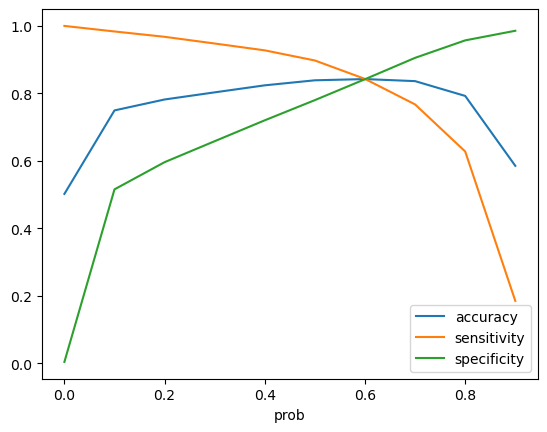

In [141]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])

Cut off Point is 0.6 at which Sensitivity,Specificity,accuracy is stable

In [143]:
y_train_predict['predicted']=y_train_predict['churn_probablity'].map(lambda X: 1 if X>0.6 else  0)
y_train_predict.head()

,Churn,churn_probablity,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.018811,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004529,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000739,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.068950,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.778486,4,1,1,1,1,1,1,1,1,0,0,1


# Calculating all metrics

In [145]:
Confusion_matrix =confusion_matrix(y_train_predict.Churn,y_train_predict.predicted)
Confusion_matrix

array([[15012,  2815],
       [ 2800, 15027]], dtype=int64)

<Axes: >

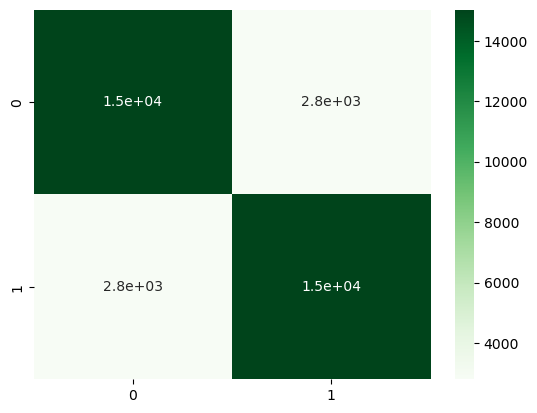

In [146]:
sns.heatmap(Confusion_matrix, annot=True, cmap='Greens')

In [147]:
TP = Confusion_matrix[1,1] # True Positive 
TN = Confusion_matrix[0,0] # True Negatives
FP = Confusion_matrix[0,1] # False Positives
FN = Confusion_matrix[1,0] # False Negatives

In [148]:
print('Accuracy', accuracy_score(y_train_predict.Churn,y_train_predict.predicted))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy 0.8425141639086778
Sensitivity:- 0.8429348740674258
Specificity:- 0.8420934537499298


### Checking precision score on Train dataset

In [150]:
precision_1 =precision_score(y_train_predict.Churn,y_train_predict[0.6])
precision_1

0.842226207824235

In [151]:
recall_1 =recall_score(y_train_predict.Churn,y_train_predict[0.6])
recall_1

0.8429348740674258

### Lets try with 0.5 cut off 

In [153]:
precision_2=precision_score(y_train_predict.Churn,y_train_predict[0.5])
precision_2

0.8032630522088353

In [154]:
recall_2=recall_score(y_train_predict.Churn,y_train_predict[0.5])
recall_2

0.8975711000168284

We can infer that Recall values is better in case of 0.5 cut off. Hence plotting roc curve on 0.5 cut off

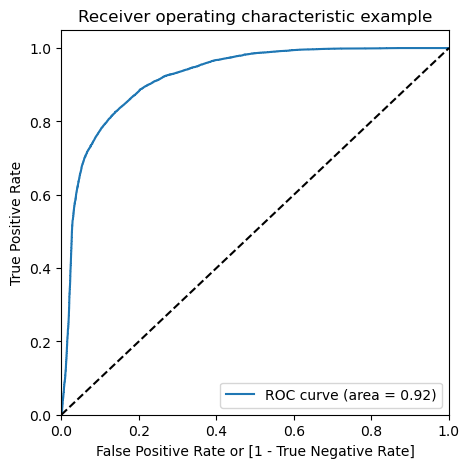

In [156]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_predict.Churn, y_train_predict.churn_probablity)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Evaluation of model on test set

In [158]:
test_data=X_train_columns.columns.to_list()
test_data

['onnet_mou_8',
 'roam_og_mou_8',
 'std_og_t2m_mou_8',
 'isd_og_mou_8',
 'og_others_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'ic_others_8',
 'monthly_2g_6',
 'monthly_2g_8',
 'monthly_3g_8',
 'decrease_volume_cost']

In [159]:
X_test_data=X_test[test_data]
X_test_data.head()

,onnet_mou_8,roam_og_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_8,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,ic_others_8,monthly_2g_6,monthly_2g_8,monthly_3g_8,decrease_volume_cost
43013,0.324370,-0.423808,-0.429136,-0.05303,-0.012887,3.669293,2.154546,1.531708,-0.071408,-0.245886,-0.235046,-0.209444,0
13786,-0.133942,-0.423808,5.245752,-0.05303,-0.012887,-0.264642,0.029350,0.539437,-0.071408,-0.245886,-0.235046,-0.209444,0
99925,2.624885,-0.423808,-0.309555,-0.05303,-0.012887,-0.264642,-0.001651,-0.247736,-0.071408,-0.245886,-0.235046,-0.209444,0
33644,-0.374552,-0.122945,-0.421568,-0.05303,-0.012887,2.317968,1.838040,2.334632,-0.018846,-0.245886,-0.235046,-0.209444,0
77701,-0.519814,-0.423808,-0.407626,-0.05303,-0.012887,-0.127531,0.359437,1.001962,0.509639,-0.245886,-0.235046,-0.209444,0


In [160]:
X_test_data.shape

(7899, 13)

In [161]:
X_test_data_sm=sm.add_constant(X_test_data)

In [162]:
y_test_pred=model_3.predict(X_test_data_sm)
y_test_pred.head()

43013    0.000106
13786    0.037721
99925    0.366137
33644    0.000034
77701    0.007088
dtype: float64

In [163]:
y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
43013,0.000106
13786,0.037721
99925,0.366137
33644,0.000034
77701,0.007088


In [164]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Churn
43013,0
13786,0
99925,0
33644,0
77701,0


In [165]:
y_test_df['CustID']=y_test_df.index
y_test_df.head()

,Churn,CustID
43013,0,43013
13786,0,13786
99925,0,99925
33644,0,33644
77701,0,77701


In [166]:
y_test_df.reset_index(drop=True,inplace=True)
y_test_pred.reset_index(drop=True,inplace=True)

In [167]:
y_test_final_predict =pd.concat([y_test_df,y_test_pred],axis=1)

In [168]:
y_test_final_predict.head()

,Churn,CustID,0
0,0,43013,0.000106
1,0,13786,0.037721
2,0,99925,0.366137
3,0,33644,0.000034
4,0,77701,0.007088


In [169]:
y_test_final_predict=y_test_final_predict.rename(columns={0:"churn_probablity"})

In [170]:
y_test_final_predict['predicted']=y_test_final_predict['churn_probablity'].map(lambda X: 1 if X>0.5 else 0)
y_test_final_predict.head()

,Churn,CustID,churn_probablity,predicted
0,0,43013,0.000106,0
1,0,13786,0.037721,0
2,0,99925,0.366137,0
3,0,33644,0.000034,0
4,0,77701,0.007088,0


In [171]:
Confusion_matrix=confusion_matrix(y_test_final_predict.Churn,y_test_final_predict.predicted)
Confusion_matrix

array([[5954, 1666],
       [  56,  223]], dtype=int64)

<Axes: >

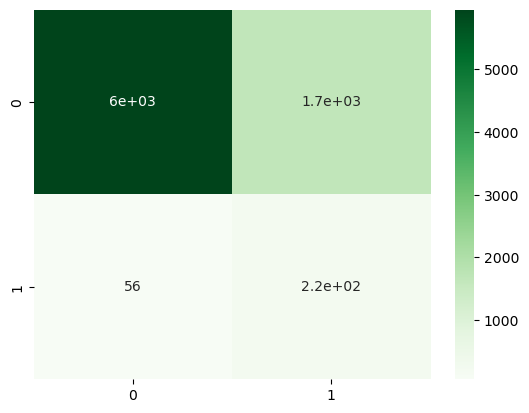

In [172]:
sns.heatmap(Confusion_matrix, annot=True,cmap='Greens')

In [173]:
TP = Confusion_matrix[1,1] # True Positive 
TN = Confusion_matrix[0,0] # True Negatives
FP = Confusion_matrix[0,1] # False Positives
FN = Confusion_matrix[1,0] # False Negatives

In [174]:
print('Accuracy', accuracy_score(y_test_final_predict.Churn,y_test_final_predict.predicted))
print('Precision', precision_score(y_test_final_predict.Churn,y_test_final_predict.predicted))
print('Recall', recall_score(y_test_final_predict.Churn,y_test_final_predict.predicted))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy 0.7819977212305355
Precision 0.11805187930121758
Recall 0.7992831541218638
Sensitivity:- 0.7992831541218638
Specificity:- 0.7813648293963255


From above mentioned Metrics we can conclude that overall performance on Test set is good

- Top variables for regression model 
loc_ic_t2f_mou_8
loc_ic_t2f_mou_7
monthly_2g_6
monthly_2g_8
loc_ic_mou_8
decrease_volume_cost
monthly_3g_8
roam_og_mou_8
onnet_mou_8
std_og_t2m_mou_8
og_others_8
ic_others_8
isd_og_mou_8isd_og_mou_8

In [177]:
Churn=new_df[new_df.Churn==1]
No_Churn=new_df[new_df.Churn==0]

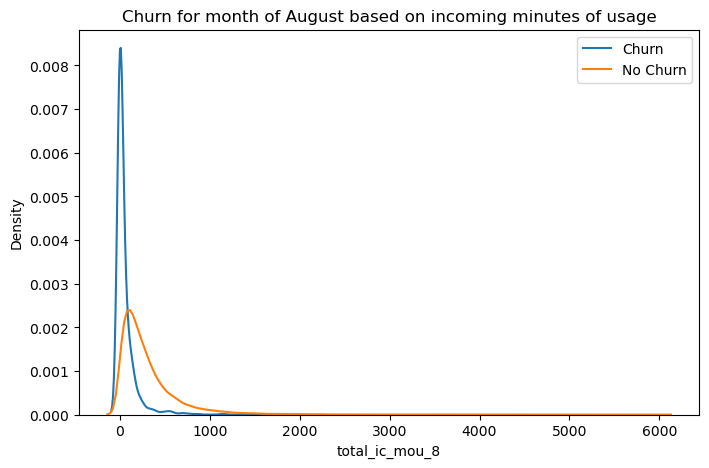

In [178]:
fig = plt.figure(figsize=(8,5))
sns.kdeplot(Churn['total_ic_mou_8'],label='Churn')
sns.kdeplot(No_Churn['total_ic_mou_8'],label='No Churn')
plt.title('Churn for month of August based on incoming minutes of usage')
plt.legend(loc='best')
plt.show()

From above mentioned Graph we can infer that Churn is less in case of incoming minute of use for the month of August

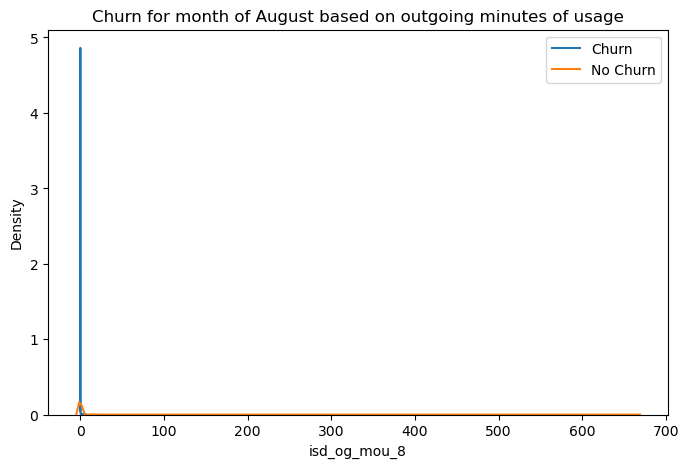

In [180]:
fig = plt.figure(figsize=(8,5))
sns.kdeplot(Churn['isd_og_mou_8'],label='Churn',)
sns.kdeplot(No_Churn['isd_og_mou_8'],label='No Churn')
plt.title('Churn for month of August based on outgoing minutes of usage')
plt.legend()
plt.show()

From above mentioned Graph we can infer that Churn is high for outgoing minutes of use

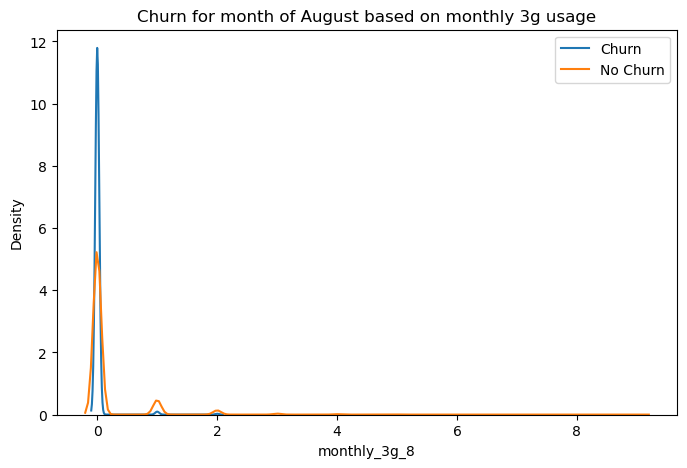

In [182]:
# Plotting Graph for churn for monthly 3G users 
fig = plt.figure(figsize=(8,5))
sns.kdeplot(Churn['monthly_3g_8'],label='Churn',)
sns.kdeplot(No_Churn['monthly_3g_8'],label='No Churn',)
plt.title('Churn for month of August based on monthly 3g usage')
plt.legend()
plt.show()

From above mentioned graph we can infer that Churn is less for monthly 3G users

# Performing Model with Principal Component Analysis

In [185]:
# Fitting the model
Pca  = PCA(random_state = 42)
Pca.fit(X_train)

PCA(random_state=42)

In [186]:
Pca.components_

array([[ 2.28693557e-02,  7.65321285e-02,  1.39963691e-01, ...,
        -2.79260521e-02, -2.77396161e-02,  1.38288717e-02],
       [ 1.08220035e-01,  1.89745927e-01,  1.33700770e-01, ...,
        -1.23948399e-02, -1.46884990e-02, -1.40390027e-02],
       [-5.29982325e-02,  1.45849510e-01,  2.02202040e-01, ...,
        -7.59830222e-02, -7.66939822e-02,  1.93573162e-02],
       ...,
       [-1.61797423e-07,  1.18024413e-07,  3.42386011e-07, ...,
        -2.10161904e-07, -2.11203059e-07,  3.89783717e-07],
       [ 1.44735677e-07, -2.47497991e-07, -9.30049725e-09, ...,
        -3.17133640e-08,  1.92683026e-08, -1.15621946e-07],
       [ 1.06912829e-07, -1.50497258e-07,  8.66546205e-08, ...,
        -2.03177797e-07,  7.69675854e-08,  8.48312164e-09]])

In [187]:
Pca.explained_variance_ratio_

array([1.10407424e-01, 7.59768706e-02, 5.13408456e-02, 4.34163226e-02,
       4.10885162e-02, 3.93899997e-02, 3.70334032e-02, 3.06255831e-02,
       2.48938849e-02, 2.44142549e-02, 2.28502283e-02, 2.16982866e-02,
       2.05340071e-02, 1.97499476e-02, 1.83093222e-02, 1.81288554e-02,
       1.72971599e-02, 1.60703421e-02, 1.51817436e-02, 1.37942942e-02,
       1.37129561e-02, 1.24022105e-02, 1.21559831e-02, 1.03834371e-02,
       1.01317011e-02, 9.72371158e-03, 9.61802555e-03, 9.30632187e-03,
       9.28980580e-03, 9.07565556e-03, 8.48896104e-03, 8.09806729e-03,
       7.97315063e-03, 7.56350744e-03, 7.35481957e-03, 7.03932359e-03,
       6.57722402e-03, 6.48832345e-03, 6.34988850e-03, 6.01891392e-03,
       5.94456276e-03, 5.77391429e-03, 5.55039036e-03, 5.49579467e-03,
       5.20715854e-03, 5.01928465e-03, 4.90613759e-03, 4.70683792e-03,
       4.47741456e-03, 4.38646207e-03, 4.07222906e-03, 3.87016927e-03,
       3.81027308e-03, 3.69875504e-03, 3.64843594e-03, 3.44249291e-03,
      

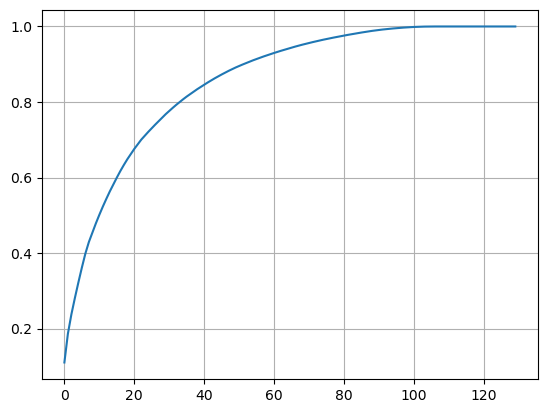

In [188]:
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [189]:
number_of_component = 60
PCA_final = PCA(n_components=number_of_component)
X_train_pca = PCA_final.fit_transform(X_train)
X_test_pca = PCA_final.fit_transform(X_test)
X_train_pca.shape, X_test_pca.shape

((35654, 60), (7899, 60))

## Making - Decision Tree Classifier

In [191]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [192]:
CV_results = pd.DataFrame(grid_search.cv_results_)
CV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.760522,0.186290,0.015621,0.000033,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.866199,0.847405,0.877173,0.890073,0.881066,0.872383,0.014652,5
1,3.358699,0.276273,0.012513,0.006257,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.866199,0.847405,0.877173,0.890073,0.881066,0.872383,0.014652,5
2,3.803124,0.055671,0.013360,0.002740,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.861711,0.840393,0.856983,0.886708,0.876578,0.864474,0.016028,7
3,3.415869,0.307495,0.016139,0.002073,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.861711,0.840393,0.856983,0.886708,0.876578,0.864474,0.016028,7
4,6.534898,0.174184,0.015792,0.000318,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.884151,0.881066,0.903253,0.895681,0.916971,0.896224,0.013082,1
5,6.489678,0.044035,0.016522,0.001798,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.884151,0.881066,0.903253,0.895681,0.916971,0.896224,0.013082,1
6,5.916316,0.374187,0.016475,0.001711,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.863955,0.864236,0.891195,0.904375,0.900140,0.884780,0.017417,3
7,5.855723,0.498671,0.015778,0.000317,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.863955,0.864236,0.891195,0.904375,0.898738,0.884500,0.017177,4


In [422]:
print("Sensitivity for grid:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Sensitivity for grid:- 0.8962244637093825
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [194]:
decision_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

decision_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

## Evaluation of model on Train Data

In [196]:
y_train_pred_dt = decision_model.predict(X_train_pca)

In [197]:
Confusion_matrix = confusion_matrix(y_train, y_train_pred_dt)
print(Confusion_matrix)

[[15590  2237]
 [ 1255 16572]]


In [198]:
TP = Confusion_matrix[1,1] # true positive 
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

In [199]:
print('Accuracy', accuracy_score(y_train, y_train_pred_dt))
print('Precision', precision_score(y_train, y_train_pred_dt))
print('Recall', recall_score(y_train, y_train_pred_dt))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy 0.9020586750434734
Precision 0.8810675740337073
Recall 0.9296011667695069
Sensitivity:- 0.9296011667695069
Specificity:- 0.8745161833174399


## Evaluation of model on test data 

In [201]:
y_test_pred_dt = decision_model.predict(X_test_pca)

In [202]:
Confusion_matrix = confusion_matrix(y_test,y_test_pred_dt)
Confusion_matrix

array([[4634, 2986],
       [ 103,  176]], dtype=int64)

In [203]:
print('Accuracy', accuracy_score(y_test,y_test_pred_dt))
print('Precision', precision_score(y_test,y_test_pred_dt))
print('Recall', recall_score(y_test,y_test_pred_dt))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy 0.6089378402329408
Precision 0.055660974067046176
Recall 0.6308243727598566
Sensitivity:- 0.9296011667695069
Specificity:- 0.8745161833174399


We get low accuracy in case and Sensetivity and specificity in case of Decision Tree analysis